# MLR Assignment

# Importing necessary libraries and Loading the Dataset

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Load the dataset
df = pd.read_csv("C:\\users\\sony\\desktop\\aiman D.Sc\\ToyotaCorolla.csv")

#  Exploratory Data Analysis (EDA)

In [5]:
# Summary statistics
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

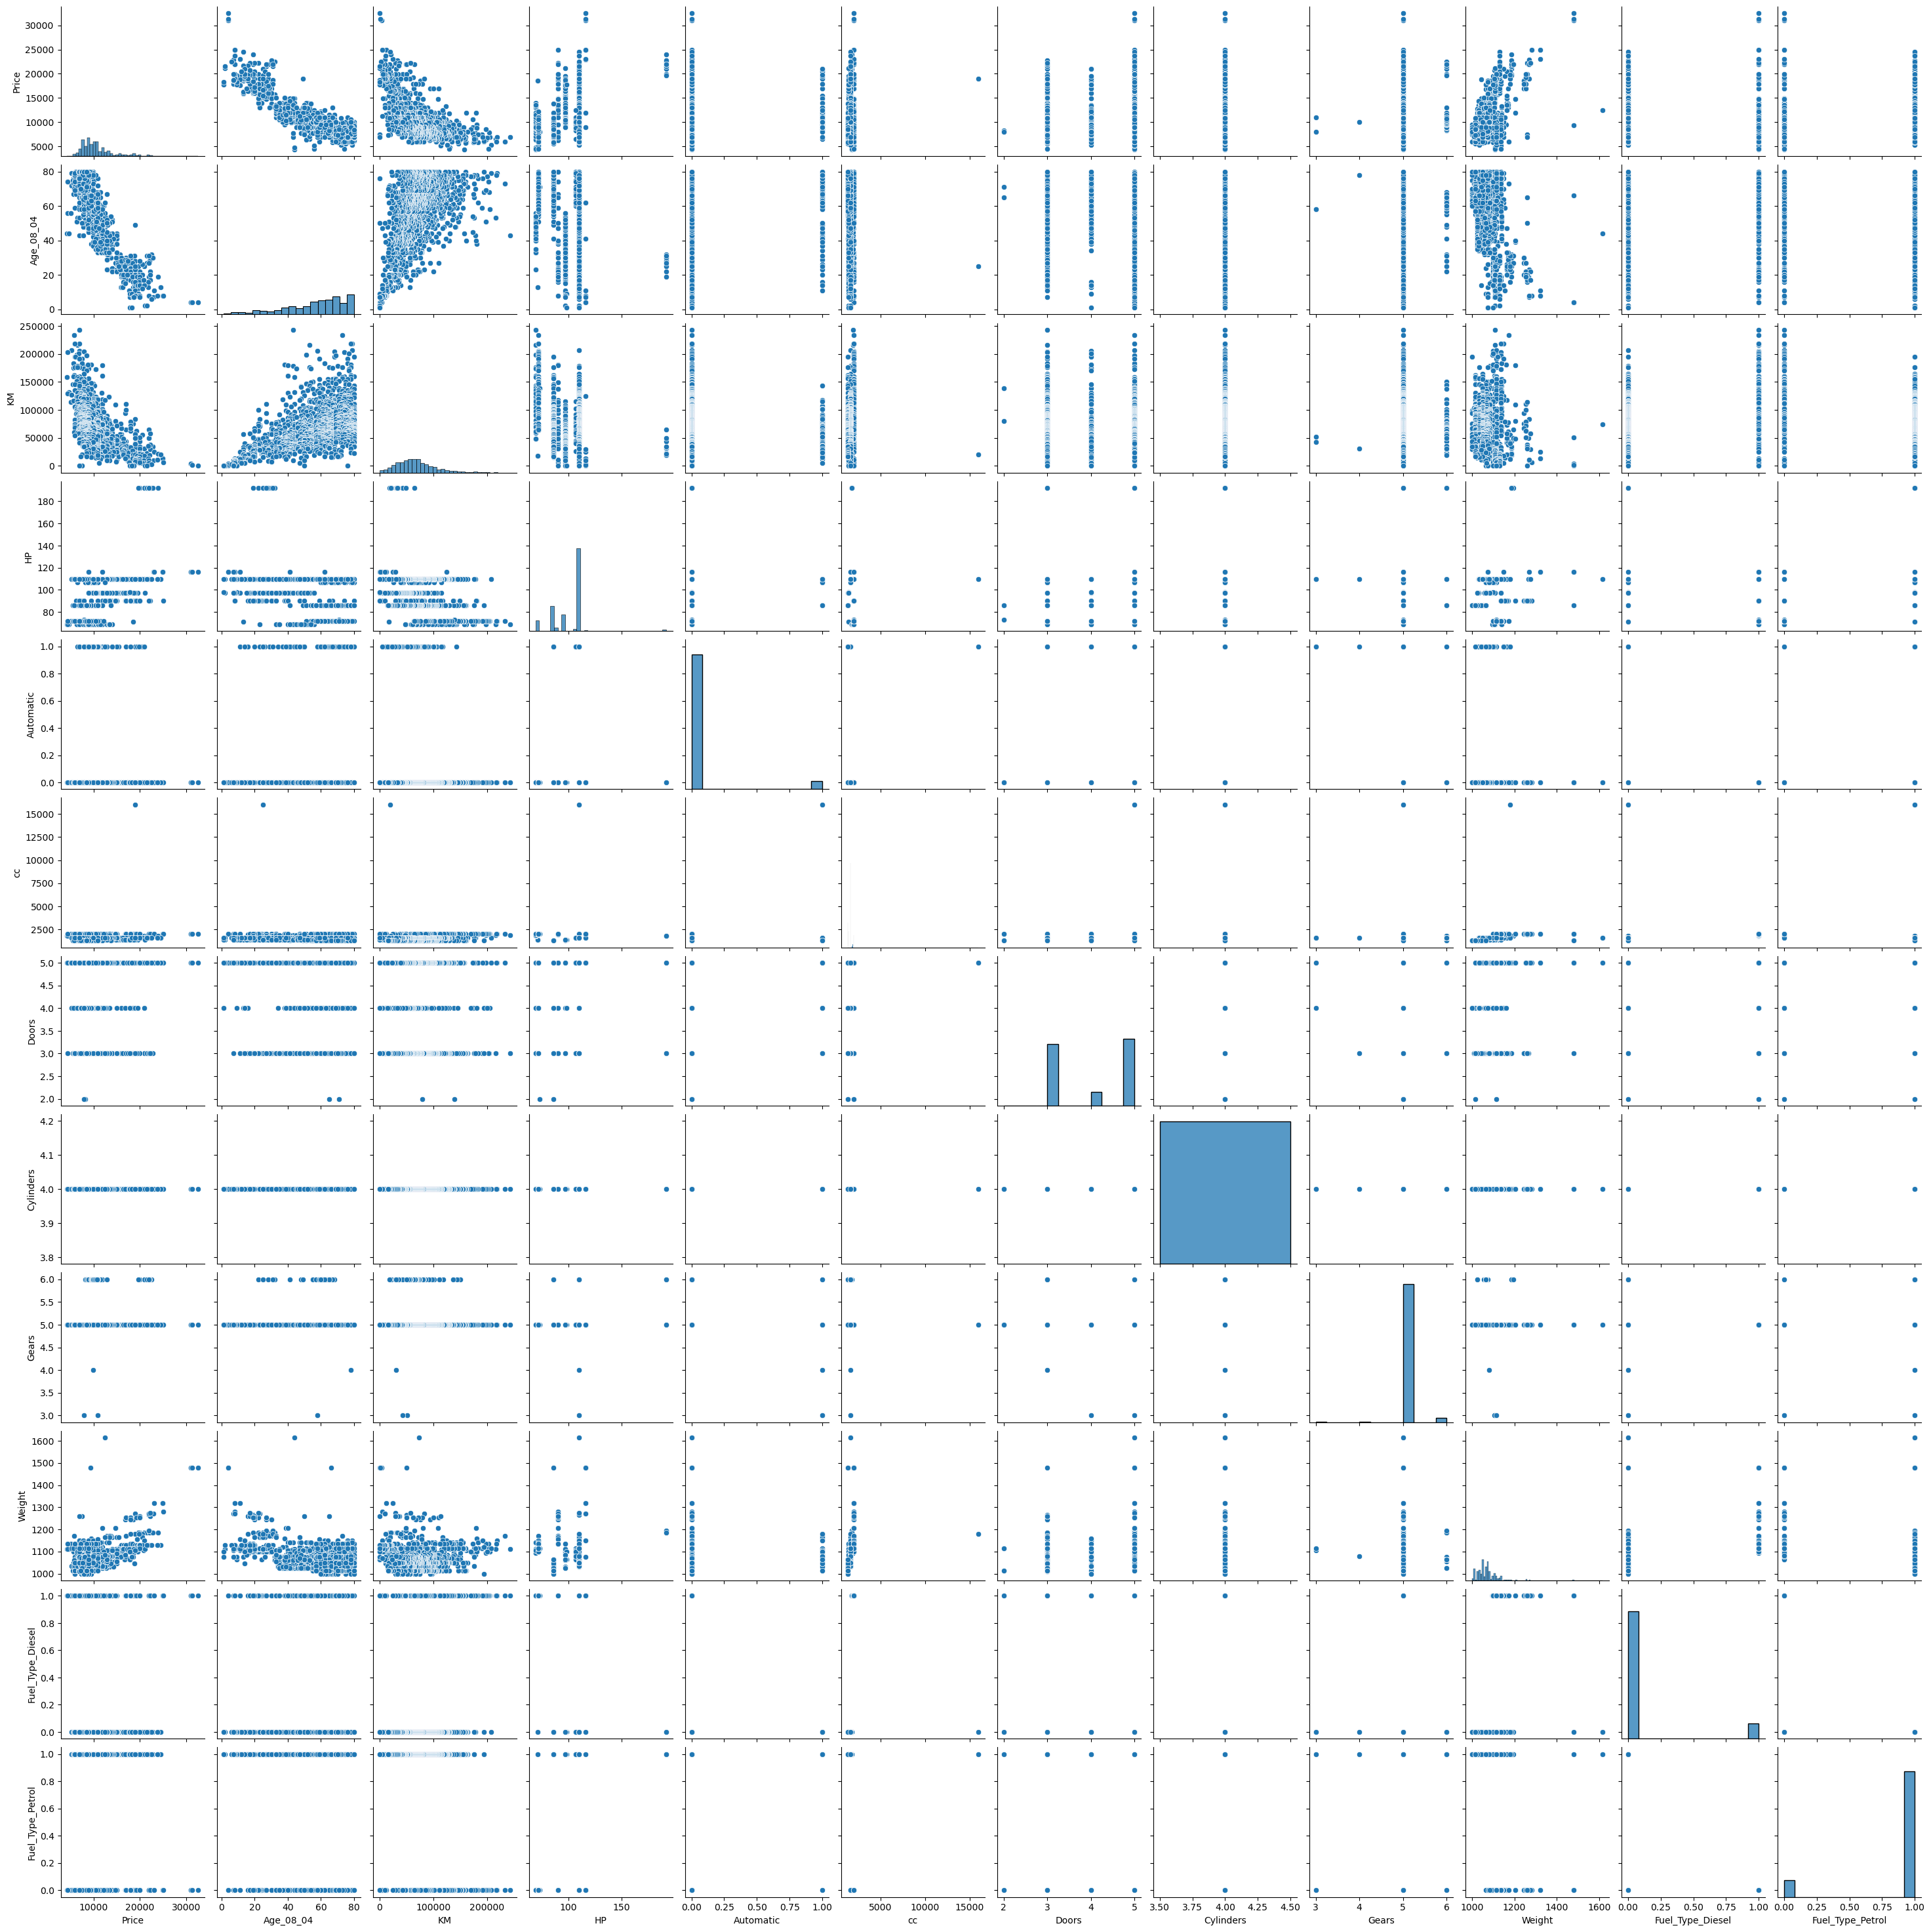

In [8]:
# Visualizations
sns.pairplot(df)
plt.show()

In [7]:
# Preprocessing
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [12]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


# Splitting the dataset into training and testing sets

In [9]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building multiple linear regression models

In [10]:
models = []

In [11]:
# Model 1: Ordinary Least Squares (OLS) Regression
model_ols = LinearRegression()
model_ols.fit(X_train, y_train)
models.append(('OLS', model_ols))

In [12]:
# Model 2: Lasso Regression
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
models.append(('Lasso', model_lasso))

In [13]:
# Model 3: Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
models.append(('Ridge', model_ridge))

# Evaluating the performance of the models

In [14]:
for name, model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}, R^2 Score: {r2}")

OLS - Mean Squared Error: 2203043.8231437025, R^2 Score: 0.8348888040611082
Lasso - Mean Squared Error: 2202270.2600246826, R^2 Score: 0.8349467801805
Ridge - Mean Squared Error: 2199746.3702333407, R^2 Score: 0.8351359377712335


# Applying Lasso and Ridge methods on the model

In [15]:
# Lasso Regression
alpha_lasso = 0.1  # Hyperparameter alpha for Lasso regularization
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_train, y_train)
lasso_coefficients = lasso_model.coef_

In [16]:
print("Lasso Regression Coefficients:")
for feature, coef in zip(X.columns, lasso_coefficients):
    print(f"{feature}: {coef}")

Lasso Regression Coefficients:
Age_08_04: -120.82721556793064
KM: -0.016240822962700227
HP: 14.091452968312002
Automatic: 147.28798072873508
cc: -0.030574858124402842
Doors: -60.14719279856615
Cylinders: 0.0
Gears: 548.6583863304609
Weight: 25.86865876664338
Fuel_Type_Diesel: -64.92487967394584
Fuel_Type_Petrol: 1370.1671976931684


In [17]:
# Ridge Regression
alpha_ridge = 1.0  # Hyperparameter alpha for Ridge regularization
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_train, y_train)
ridge_coefficients = ridge_model.coef_

In [18]:
print("\nRidge Regression Coefficients:")
for feature, coef in zip(X.columns, ridge_coefficients):
    print(f"{feature}: {coef}")


Ridge Regression Coefficients:
Age_08_04: -120.77965945868485
KM: -0.01632407954257211
HP: 14.141834012008308
Automatic: 146.9074697160858
cc: -0.030509438556814334
Doors: -59.90579131646382
Cylinders: 0.0
Gears: 542.2723281414686
Weight: 25.821019441618816
Fuel_Type_Diesel: -128.81307202317004
Fuel_Type_Petrol: 1294.949825898624


In [ ]:
# Interview Questions
# 1. Normalization & Standardization
# Normalization scales the features to a range between 0 and 1, whereas standardization scales the features so that they have mean 0 and standard deviation 1. 
# Both techniques help in improving the performance and convergence of machine learning algorithms, especially those based on gradient descent.

# 2. Techniques to address multicollinearity
# - Remove one of the correlated variables.
# - Combine the correlated variables into a single feature.
# - Use dimensionality reduction techniques like Principal Component Analysis (PCA).
# - Regularization techniques like Lasso and Ridge regression.

# Assumptions made during the analysis:
# - The dataset is assumed to be representative of the population.
# - There are no significant outliers in the dataset.
# - The relationship between the independent variables and the dependent variable is linear.

# Implications of assumptions:
# Violation of these assumptions may lead to biased estimates and incorrect inferences. It's important to validate these assumptions before interpreting the results.